In [3]:
import networkx as nx
import matplotlib.pyplot as plt

## Basics
A graph is a structure composed of vertices (or nodes) and edges. It is useful to represent relations between entities (e.g. friendships in social networks). Both nodes and edges can contain arbitrary attributes. In the context of a social network, nodes can represent users and hold attributes such as username, profile description, image and so on. Edges can represent a relationship between two users and contain data such as the starting date of the relationship.

<b> Directed Graphs </b>

Edges represent unidirectional relationships such as twitter followers. User A following user B not necessarily means that user B also follows user A.

Text(0.5, 1.0, 'Directed Graph')

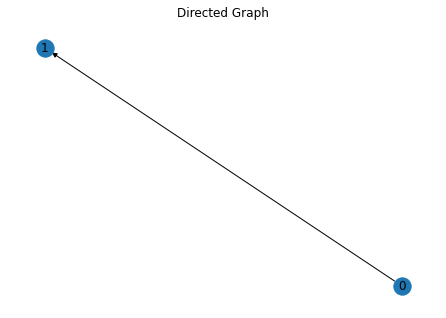

In [4]:
G = nx.DiGraph()
G.add_node(0, username="person1", description="an user", image="dog.jpeg")
G.add_node(1, username="person2", description="another user", image="cat.jpeg")
G.add_edge(0, 1, starting_date="01-01-2022")
nx.draw(G, with_labels=True)
plt.title("Directed Graph")

<b> Undirected Graphs </b>

Edges represent bidirectional relationships such as facebook friendships. User A is friends with user B means both of them are friends at the same time.

Text(0.5, 1.0, 'Undirected Graph')

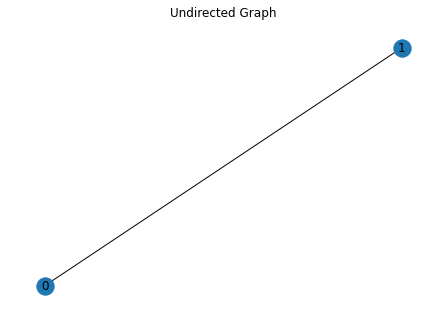

In [5]:
G = nx.Graph()
G.add_node(0, username="person1", description="an user", image="dog.jpeg")
G.add_node(1, username="person2", description="another user", image="cat.jpeg")
G.add_edge(0, 1, starting_date="01-01-2022")
nx.draw(G, with_labels=True)
plt.title("Undirected Graph")

#### Other Types of Graphs

<b>Multigraph</b>

A pair of nodes u and v can contain multiple edges between themselves.

In [6]:
G = nx.MultiGraph()
G.add_node(0, username="person1", description="an user", image="dog.jpeg")
G.add_node(1, username="person2", description="another user", image="cat.jpeg")
G.add_edge(0, 1, starting_date="01-01-2022")
G.add_edge(0, 1, type="friendship")
print("Is G a multigraph?", G.is_multigraph())
print("Edges:", G.edges)

Is G a multigraph? True
Edges: [(0, 1, 0), (0, 1, 1)]



<b> Bipartite Graphs </b>

A graph whose nodes can be divided into multiple disjointed sets A and B such that every edge is always connecting a node
from A to a node from B, never a node from A to another node from A or a node from B connecting another node from B. A and B
are <b>independent</b> sets.


Is G bipartite? True
Edges: [(0, 4), (1, 5), (2, 6), (3, 7)]
Top Nodes: {0, 1, 2, 3}
Bottom Nodes: {4, 5, 6, 7}


Text(0.5, 1.0, 'Bipartite Graph')

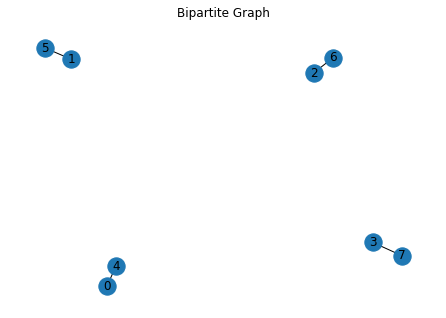

In [18]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3], bipartite=0)
G.add_nodes_from([4,5,6,7], bipartite=1)
G.add_edges_from([(0,4), (1,5), (2,6), (3,7)])

print("Is G bipartite?", nx.is_bipartite(G))
print("Edges:", G.edges)
top_nodes = {node for node, attrs in G.nodes(data=True) if attrs["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes

print("Top Nodes:", top_nodes)
print("Bottom Nodes:", bottom_nodes)

nx.draw(G, with_labels=True)
plt.title("Bipartite Graph")

## Graph Representation
These are the most common and efficient ways of representing graphs computationally.

<b>Adjacency Matrix</b>

The graph is stored in a matrix M which rows and columns represent the nodes and each cell M[i][j]
represents the edge between node i and node j. This approach is difficult to apply in large graphs because they tend to
be <b>sparse</b> (a node is connected to a small fraction of the entire graph), meaning that despite using a matrix
of size |V|ˆ2, only a small subset of the values will be different from zero.

<b>Adjacency List</b>

The graph is stored in a <b>linked list</b>. Each node points to a list of the nodes that are connected to itself (neighbors).

In [64]:
print("Matrix:\n", nx.adjacency_matrix(G).todense())

print("Linked List:\n", G.adj)  # adjacency view
# next(iter(G.adjacency()))  # adjacency iterable

Matrix:
 [[0 1]
 [0 0]]
Linked List:
 {0: {1: {'starting_date': '01-01-2022'}}, 1: {}}


/var/folders/gr/bzk4hy1x0mx2h904kggn7zm80000gn/T/ipykernel_56660/4146338515.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print("Matrix:\n", nx.adjacency_matrix(G).todense())


In [66]:
## Graph Properties
G.get_edge_data(0, 1)

{'starting_date': '01-01-2022'}

In [ ]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)
print("Number of nodes:", G.order())
print("Number of edges:", G.size())
print("Nodes:", G.nodes, end="\n\n")
print("Edges:", G.edges)
print("")